In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "drive/MyDrive/Colab Notebooks/"
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d .

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 99% 1.32G/1.33G [00:08<00:00, 191MB/s]
100% 1.33G/1.33G [00:08<00:00, 168MB/s]


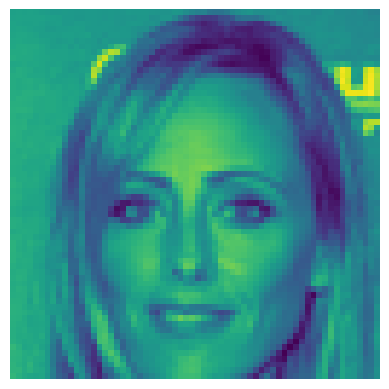

In [7]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# 올바른 디렉토리 경로 설정
base_path = '/content/img_align_celeba/img_align_celeba'

# 디렉토리 존재 여부 확인
if not os.path.exists(base_path):
    raise FileNotFoundError(f"디렉토리가 존재하지 않습니다: {base_path}")

# 파일 목록 불러오기
파일리스트 = os.listdir(base_path)

images = []

# 파일 처리
for i in 파일리스트[:50000]:  # 슬라이싱을 통해 첫 50000개 파일만 처리
    file_path = os.path.join(base_path, i)  # 파일 경로 생성
    if not os.path.isfile(file_path):  # 파일인지 확인
        print(f"파일이 존재하지 않습니다: {file_path}")
        continue
    try:
        숫자화된거 = (
            Image.open(file_path)
            .crop((20, 30, 160, 180))  # 이미지 자르기
            .convert('L') # 흑백
            .resize((64, 64))  # 이미지 크기 조정
        )
        images.append(np.array(숫자화된거))
    except Exception as e:
        print(f"이미지 처리 중 오류 발생: {file_path}, 오류: {e}")

# 이미지 표시
if images:
    plt.imshow(images[0])
    plt.axis('off')
    plt.show()
else:
    print("이미지가 비어 있습니다. 확인해 주세요.")


In [8]:
images = np.divide(images, 255)
images = images.reshape(50000, 64,64,1)
print(images.shape)

(50000, 64, 64, 1)


In [9]:
#Discriminator

import tensorflow as tf

discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ),
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,374,977 (5.25 MB)

 Trainable params: 1,374,081 (5.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [10]:
GAN = tf.keras.models.Sequential([generator, discriminator])

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

discriminator.trainable = False
GAN.compile(loss='binary_crossentropy', optimizer='adam')



In [11]:
랜덤숫자 = np.random.uniform(-1, 1, size=(8,100))

예측 = generator.predict(랜덤숫자)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


In [12]:
print(예측.shape)

(8, 64, 64, 1)


In [13]:
def predict_pic():

  for i in range(8):
      plt.subplot(2, 5, i + 1)  # 2행 5열 중 i+1 번째 위치에 서브플롯 추가
      plt.imshow(예측[i].reshape(64, 64), cmap="gray")  # 이미지를 회색조로 출력
      plt.axis('off')  # 축 제거
  plt.tight_layout()  # 서브플롯 간 간격 조정
  plt.show()  # 모든 서브플롯을 한 번에 출력

지금 epoch : 0


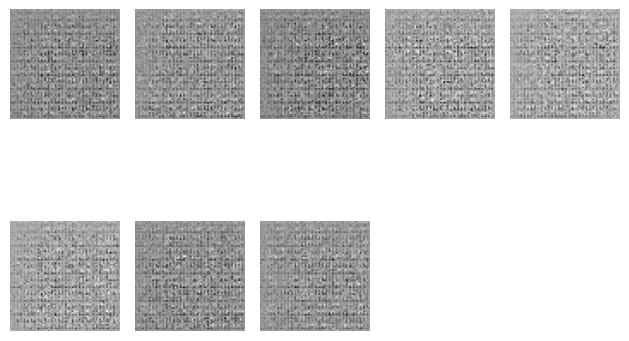

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
X데이터 = images

#discriminator 트레이닝

for j in range(300):
  print(f'지금 epoch : {j}')
  predict_pic()


  for i in range(50000//128):
    # batch
    진짜사진들 = X데이터[i*128: (i+1)*128]
    마킹한정답들1 = np.ones(shape=(128,1))
    loss1 = discriminator.train_on_batch(진짜사진들, 마킹한정답들1)

    랜덤숫자 = np.random.uniform(-1, 1, size=(128,100))
    가짜사진들 = generator.predict(랜덤숫자)
    마킹한정답들0 = np.zeros(shape=(128,1))
    loss2 = discriminator.train_on_batch(가짜사진들, 마킹한정답들0)

    #generator 트레이닝
    랜덤숫자 = np.random.uniform(-1, 1, size=(128,100))
    마킹한정답들1 = np.ones(shape=(128,1))
    loss3 = GAN.train_on_batch(랜덤숫자, 마킹한정답들1)
  print(f'이번 epoch 의 최종 loss {loss1 + loss2} GAN {loss3}')


